In [2]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")

tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [3]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

tweets.head()

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-05-18 22:00:02+00:00
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:02+00:00


In [4]:
entities = pd.read_csv("entities.csv")

entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [5]:
companies = pd.read_csv("companies.csv")

companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


# Section 1

In [8]:
import re
import matplotlib.pyplot as plt

def extract_cashtags(tweet_text):
    return list(set([cashtag[1:].upper() for cashtag in re.findall(r'\$[A-Za-z][\w]*', tweet_text)]))

# Apply the function to the 'message' column of the dataset
tweets['cashtags'] = tweets['text'].apply(extract_cashtags)

# Count the occurrences of each cashtag
cashtag_counts = tweets.explode('cashtags')['cashtags'].value_counts()

most_mentioned = cashtag_counts.idxmax()
least_mentioned = cashtag_counts.idxmin()

print(f"The most mentioned cashtag is {most_mentioned} with {cashtag_counts[most_mentioned]} mentions.")
print(f"The least mentioned cashtag is {least_mentioned} with {cashtag_counts[least_mentioned]} mentions.")

The most mentioned cashtag is ETH with 331769 mentions.
The least mentioned cashtag is TNDMUP with 1 mentions.


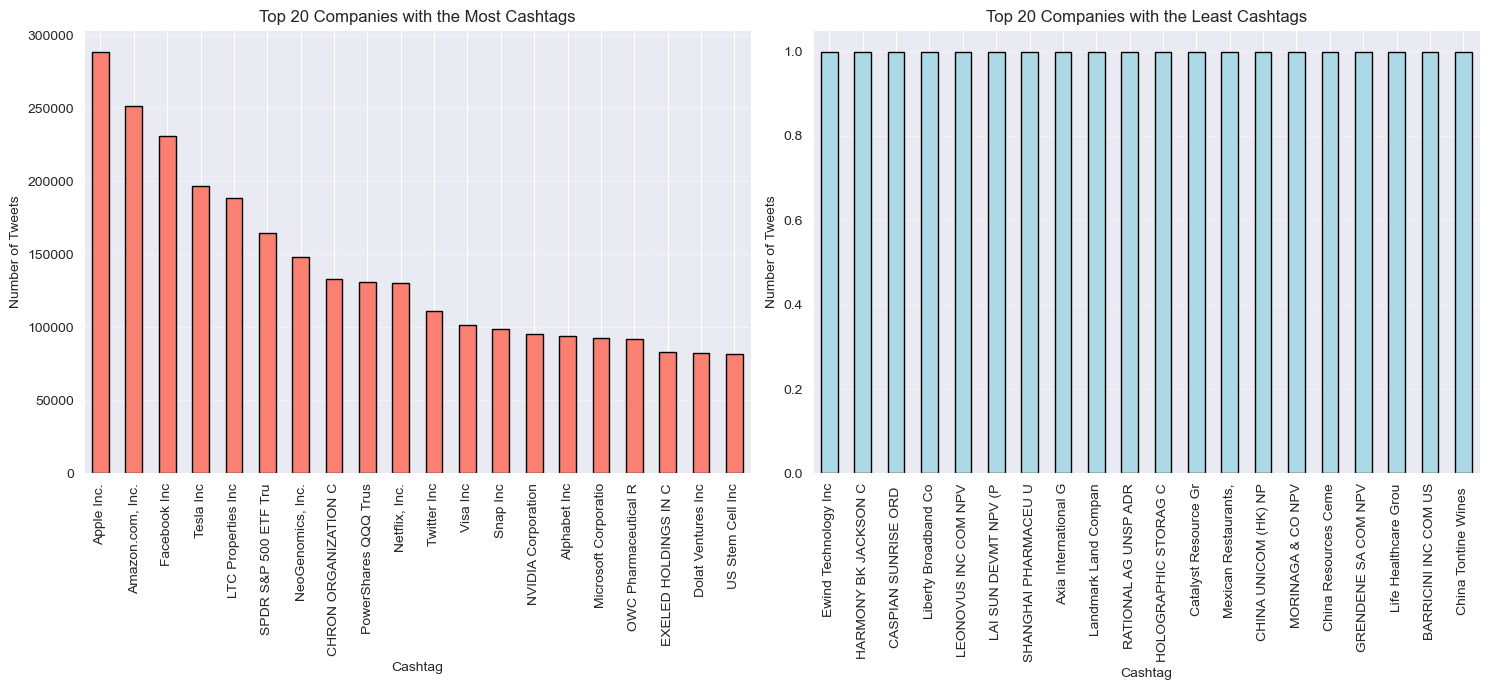

In [9]:
# Filter the cashtag counts to only include companies in companies
filtered_cashtag_counts = cashtag_counts[cashtag_counts.index.isin(companies['ticker'])]
# Replace the index names in filtered_cashtag_counts
filtered_cashtag_counts.index = filtered_cashtag_counts.index.map(companies.set_index('ticker')['name'].to_dict())
# Get the 20 cashtags with the most and tweets
top_20_cashtags = filtered_cashtag_counts.nlargest(20)
bot_20_cashtags = filtered_cashtag_counts.nsmallest(20)

# Create a bar chart for the 20 cashtags with the most tweets
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
top_20_cashtags.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Cashtag')
plt.ylabel('Number of Tweets')
plt.title('Top 20 Companies with the Most Cashtags')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Create a bar chart for the 20 cashtags with the least tweets
plt.subplot(1, 2, 2)
bot_20_cashtags.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Cashtag')
plt.ylabel('Number of Tweets')
plt.title('Top 20 Companies with the Least Cashtags')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

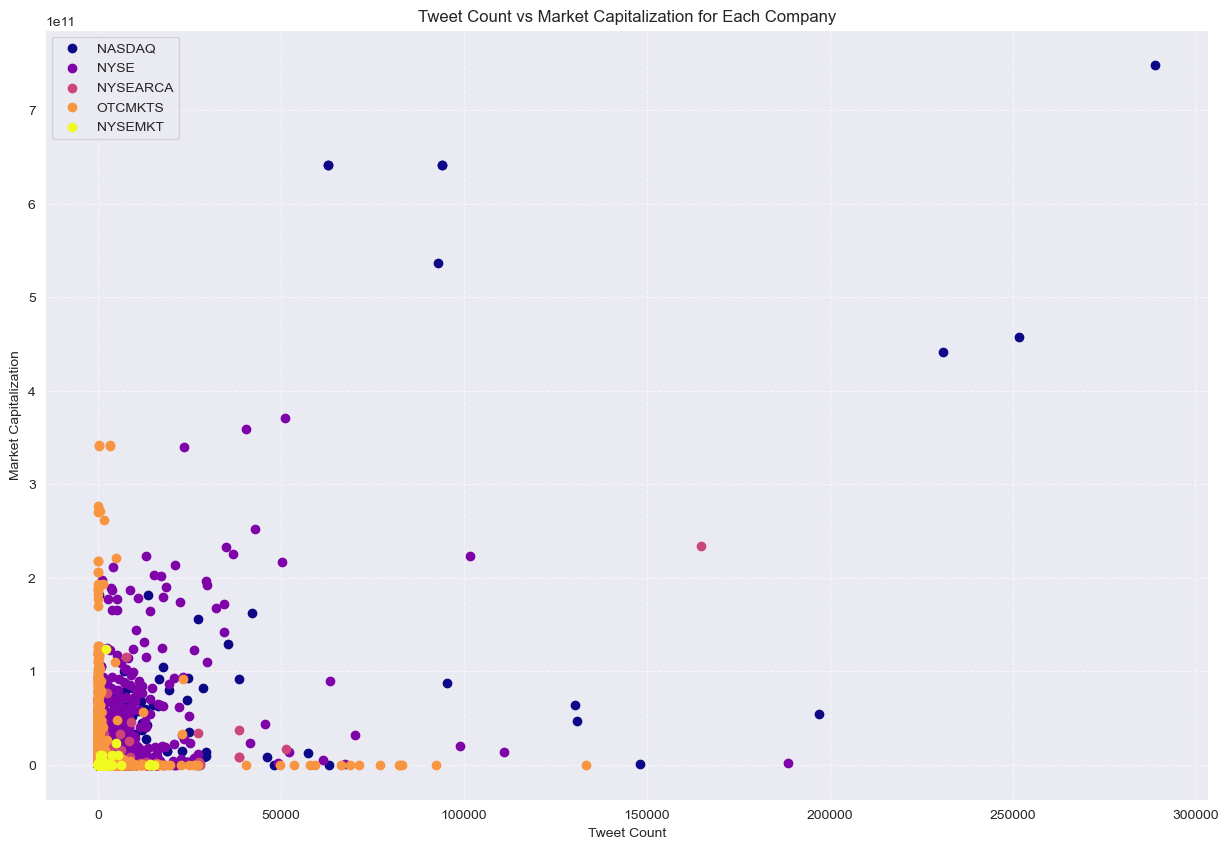

In [10]:
import numpy as np

# Convert the cashtag_counts Series into a DataFrame
cashtag_counts = filtered_cashtag_counts.reset_index()
# Rename the columns
cashtag_counts.columns = ['company_name', 'tweet_count']
# Merge the cashtag_counts_df with companies on 'company_name'
merged_df = pd.merge(cashtag_counts, companies, left_on='company_name', right_on='name')
# Create a color dictionary for each exchange
unique_exchanges = merged_df['exchange'].unique()
color_map = plt.cm.plasma(np.linspace(0, 1, len(unique_exchanges)))
exchange_color_dict = dict(zip(unique_exchanges, color_map))

plt.figure(figsize=(15, 10))

# Create a scatter plot of tweet_count vs market_capitalization for each company
for exchange in unique_exchanges:
    exchange_data = merged_df[merged_df['exchange'] == exchange]
    plt.scatter(exchange_data['tweet_count'], exchange_data['capitalization'], color=exchange_color_dict[exchange], label=exchange)

plt.xlabel('Tweet Count')
plt.ylabel('Market Capitalization')
plt.title('Tweet Count vs Market Capitalization for Each Company')
plt.legend()
plt.grid(linestyle='--', alpha=0.6)

plt.show()

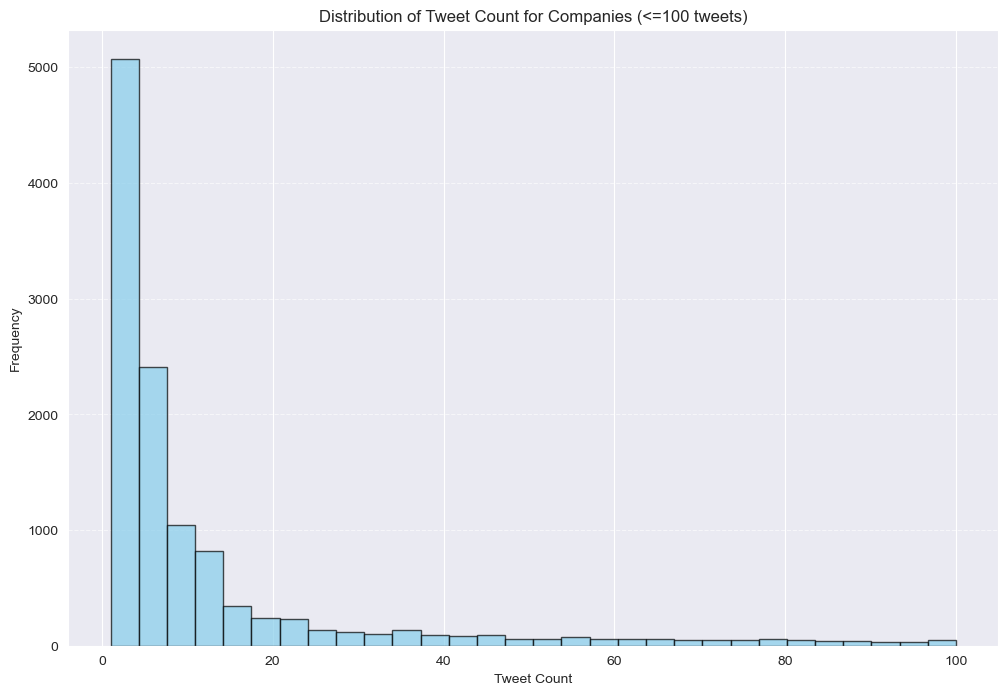

In [11]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Filter the data to include only companies with a tweet count of 100 or less
filtered_tweet_counts = cashtag_counts[cashtag_counts['tweet_count'] <= 100]['tweet_count']

# Create a histogram of the filtered tweet counts with different color and edge
plt.hist(filtered_tweet_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Set the labels and title
plt.xlabel('Tweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Count for Companies (<=100 tweets)')

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

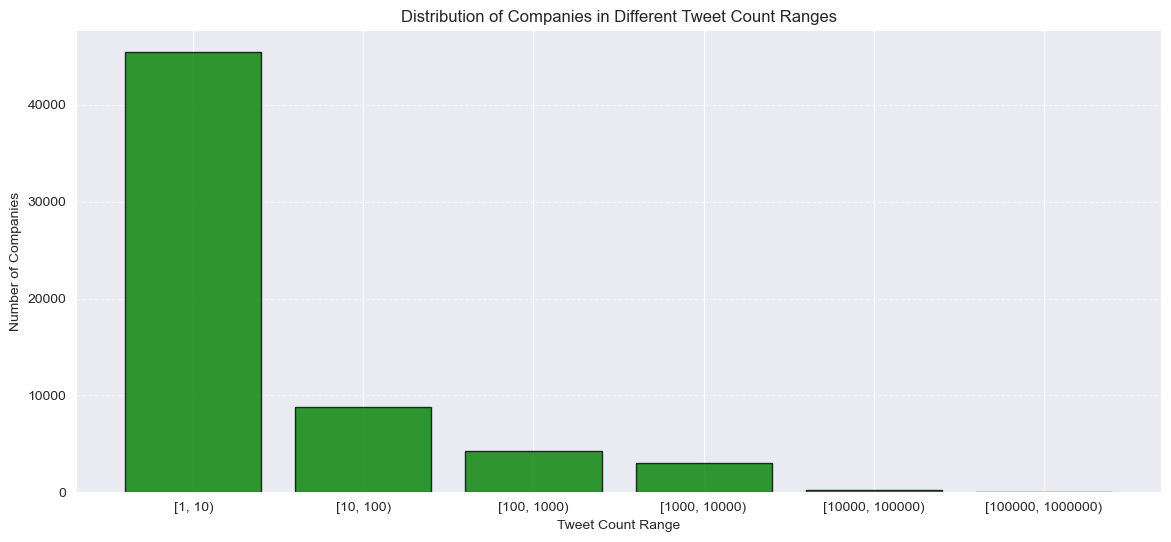

In [12]:
# Create tweet count ranges
tweet_count_ranges = [10**i for i in range(0, 7)]
# Categorize companies into different tweet count ranges
companies_in_ranges = pd.cut(cashtag_counts, bins=tweet_count_ranges, include_lowest=True, right=False).value_counts(sort=False)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a bar plot of the number of companies in each tweet count range with different color
plt.bar(companies_in_ranges.index.astype(str), companies_in_ranges, color='green', edgecolor='black', alpha=0.8)

# Set the labels and title
plt.xlabel('Tweet Count Range')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies in Different Tweet Count Ranges')

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<Figure size 1200x800 with 0 Axes>

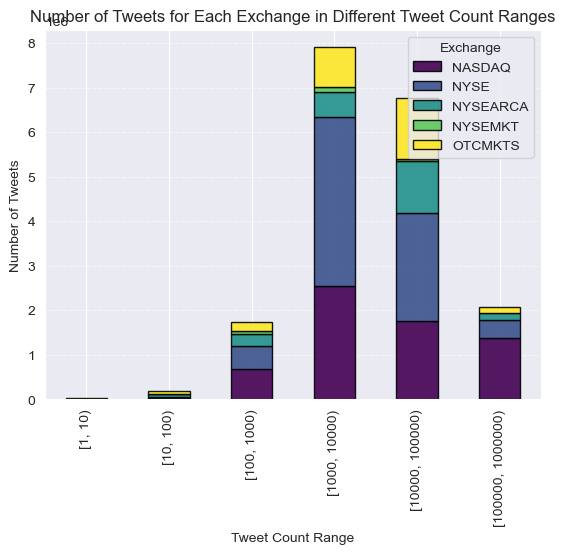

In [13]:
# Define the tweet count ranges
tweet_count_ranges = [10**i for i in range(0, 7)]
# Create a new column 'tweet_count_range' that categorizes 'tweet_counts' into ranges
merged_df['tweet_count_range'] = pd.cut(merged_df['tweet_count'], bins=tweet_count_ranges, include_lowest=True, right=False)
# Pivot the DataFrame to get the count of tweets for each exchange in each tweet count range
pivot_df = pd.pivot_table(merged_df, values='tweet_count', index='tweet_count_range', columns='exchange', aggfunc=np.sum, fill_value=0)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a stacked bar graph with different color palette
pivot_df.plot(kind='bar', stacked=True, cmap='viridis', edgecolor='black', alpha=0.9)

# Set the labels and title
plt.xlabel('Tweet Count Range')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for Each Exchange in Different Tweet Count Ranges')

# Add a legend
plt.legend(title='Exchange', loc='upper right')

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Section 2

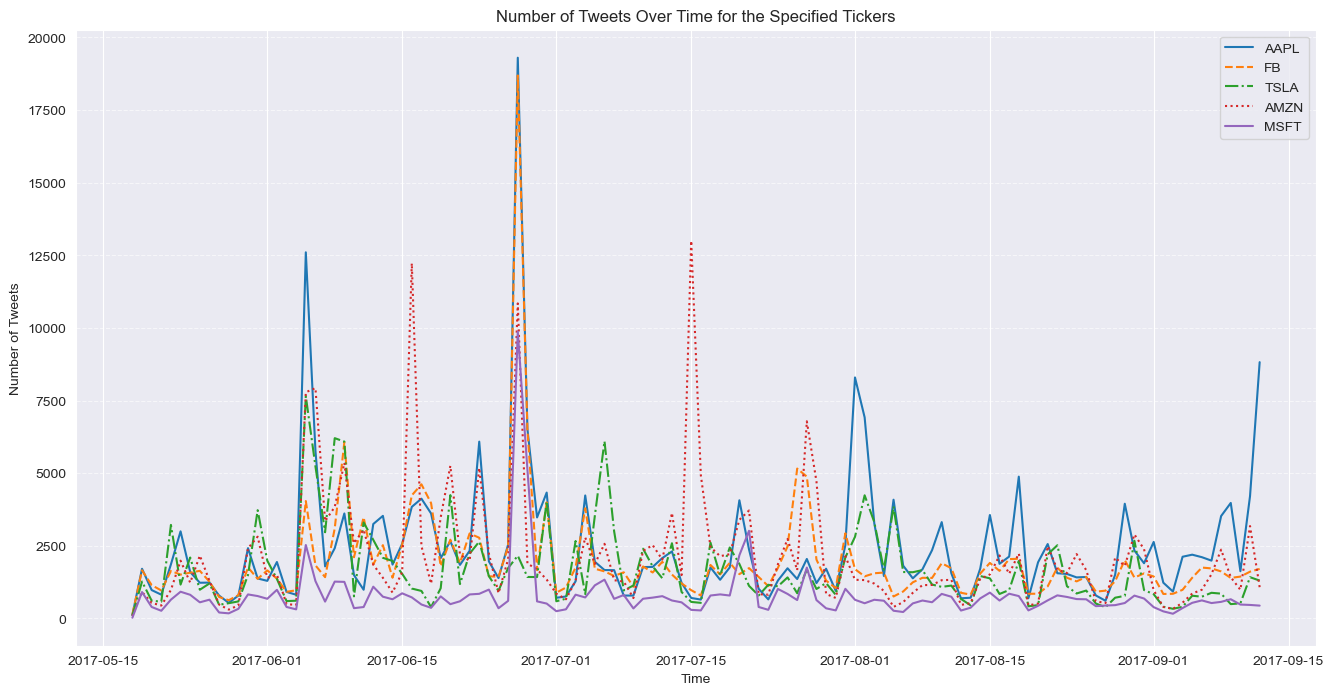

In [19]:
# Explode the 'cashtags' column in the tweets DataFrame
tweets['hour_of_day'] = tweets['created_at'].dt.hour
tweets_with_cashtags = tweets.explode('cashtags')

# Merge the tweets DataFrame with the companies DataFrame on the cashtags/ticker
merged_tweets_companies = pd.merge(tweets_with_cashtags, companies, left_on='cashtags', right_on='ticker')

# Group by 'ticker' and 'created_at' to get daily tweet counts
daily_tweet_counts = merged_tweets_companies.groupby(['ticker', pd.Grouper(key='created_at', freq='D')]).size().reset_index(name='tweet_counts')

# Set the figure size
plt.figure(figsize=(16, 8))

# List of tickers to plot
tickers_to_plot = ['AAPL', 'FB', 'TSLA', 'AMZN', 'MSFT'] # Companies of other sectors mostly had low tweets, so I used mostly Technology companies!

# Create a line plot of tweet counts over time for each ticker with different line styles
line_styles = ['-', '--', '-.', ':', '-']
for i, ticker in enumerate(tickers_to_plot):
    ticker_data = daily_tweet_counts[daily_tweet_counts['ticker'] == ticker]
    plt.plot(ticker_data['created_at'], ticker_data['tweet_counts'], label=ticker, linestyle=line_styles[i])

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time for the Specified Tickers')

# Add a legend
plt.legend()

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<Figure size 1200x800 with 0 Axes>

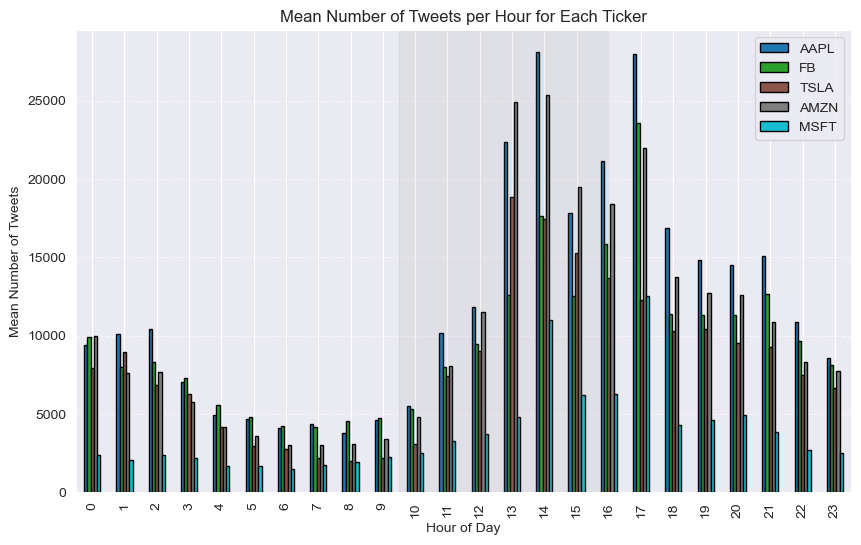

In [20]:
# Define the tickers to plot
tickers_to_plot = ['AAPL', 'FB', 'TSLA', 'AMZN', 'MSFT']

# Initialize an empty DataFrame to store the mean number of tweets per hour for each ticker
mean_tweets_by_hour_df = pd.DataFrame()

# Calculate the mean number of tweets per hour for each ticker and add it to mean_tweets_by_hour_df
for ticker in tickers_to_plot:
    tweets_ticker = tweets_with_cashtags[tweets_with_cashtags['cashtags'] == ticker]
    mean_tweets_by_hour = tweets_ticker.groupby('hour_of_day').size()
    mean_tweets_by_hour_df[ticker] = mean_tweets_by_hour

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a grouped bar plot with different color palette
mean_tweets_by_hour_df.plot(kind='bar', colormap='tab10', edgecolor='black', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Mean Number of Tweets')
plt.title('Mean Number of Tweets per Hour for Each Ticker')

# Add a legend
plt.legend()

# Add a shaded region to represent typical trading hours
plt.axvspan(9.5, 16, color='gray', alpha=0.1)

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

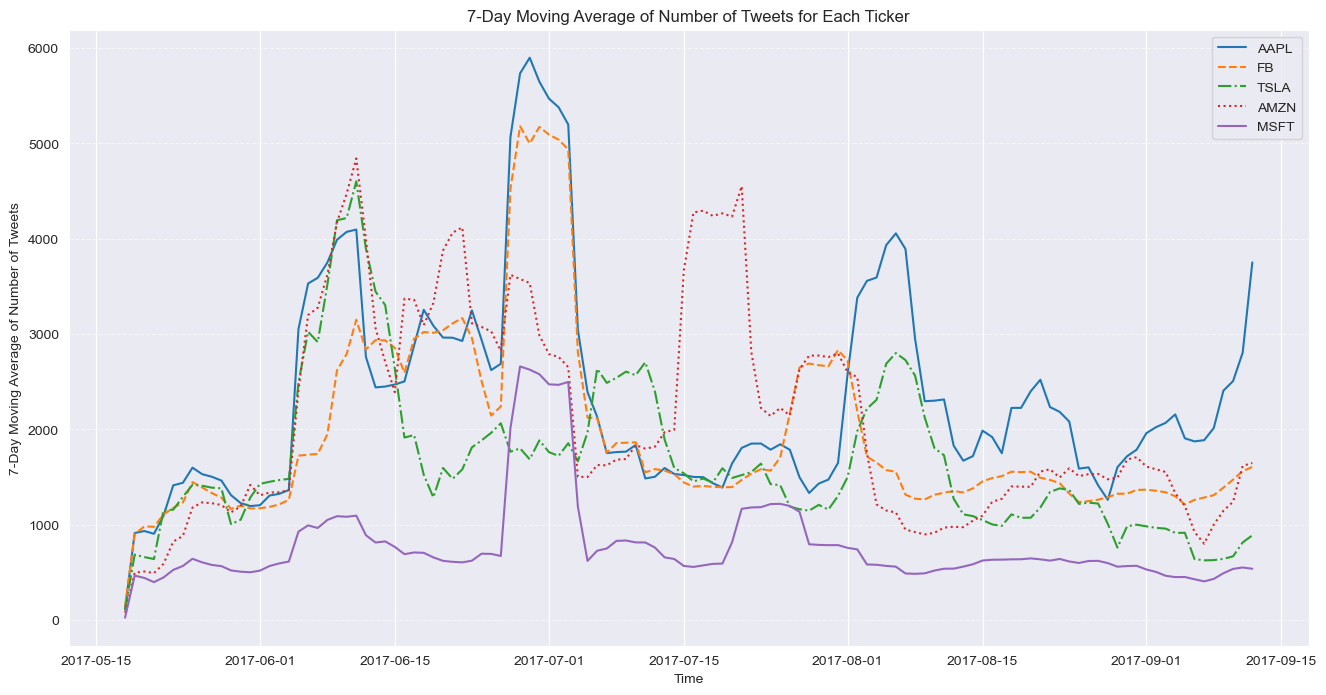

In [21]:
# Merge the tweets DataFrame with the companies DataFrame on the cashtags/ticker
merged_tweets_companies = pd.merge(tweets_with_cashtags, companies, left_on='cashtags', right_on='ticker')

# Group by 'ticker' and 'created_at' to get daily tweet counts
daily_tweet_counts = merged_tweets_companies.groupby(['ticker', pd.Grouper(key='created_at', freq='D')]).size().reset_index(name='counts')

# Calculate the 7-day moving average of the number of tweets for each ticker
daily_tweet_counts['moving_avg_counts'] = daily_tweet_counts.groupby('ticker')['counts'].transform(lambda x: x.rolling(7, min_periods=1).mean())

# Set the figure size
plt.figure(figsize=(16, 8))

# List of tickers to plot
tickers_to_plot = ['AAPL', 'FB', 'TSLA', 'AMZN', 'MSFT']

# Create a line plot of the 7-day moving average of tweet counts for each ticker with different line styles
line_styles = ['-', '--', '-.', ':', '-']
for i, ticker in enumerate(tickers_to_plot):
    ticker_data = daily_tweet_counts[daily_tweet_counts['ticker'] == ticker]
    plt.plot(ticker_data['created_at'], ticker_data['moving_avg_counts'], label=ticker, linestyle=line_styles[i])

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('7-Day Moving Average of Number of Tweets')
plt.title('7-Day Moving Average of Number of Tweets for Each Ticker')

# Add a legend
plt.legend()

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Section 3

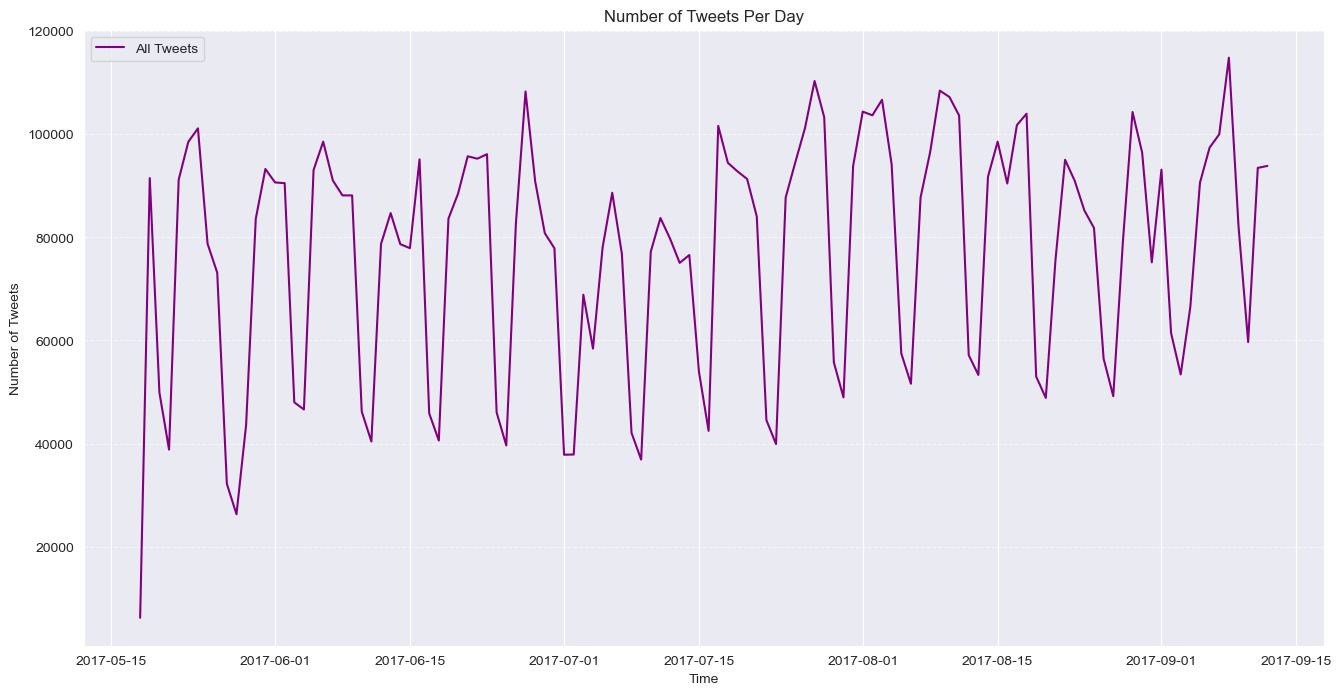

In [22]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Group by 'created_at' to get daily tweet counts
all_daily_tweet_counts = tweets.groupby([pd.Grouper(key='created_at', freq='D')]).size().reset_index(name='tweet_counts')

# Create a line plot of the number of tweets per day with a different color
plt.plot(all_daily_tweet_counts['created_at'], all_daily_tweet_counts['tweet_counts'], color='purple', label='All Tweets')

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Per Day')

# Add a legend
plt.legend()

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

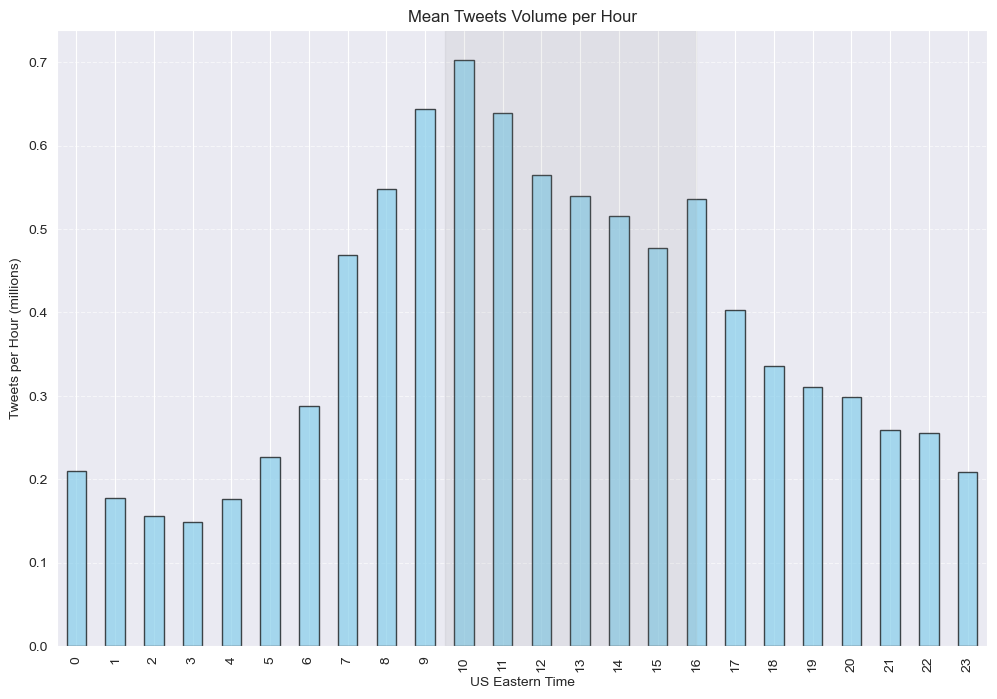

In [25]:
# Convert the 'created_at' column to US Eastern Time
tweets['created_at_eastern'] = tweets['created_at'].dt.tz_convert('US/Eastern')

# Extract the hour from the 'created_at_eastern' column
tweets['hour_of_day'] = tweets['created_at_eastern'].dt.hour

# Group by the hour_of_day and calculate the mean number of tweets
mean_tweets_per_hour = tweets.groupby('hour_of_day').size() / 1000000

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot of the mean number of tweets per hour with different color
mean_tweets_per_hour.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Set the labels and title
plt.xlabel('US Eastern Time')
plt.ylabel('Tweets per Hour (millions)')
plt.title('Mean Tweets Volume per Hour')

# Highlight the trading hours (9:30 AM - 4:00 PM)
plt.axvspan(9.5, 16, color='gray', alpha=0.1)

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

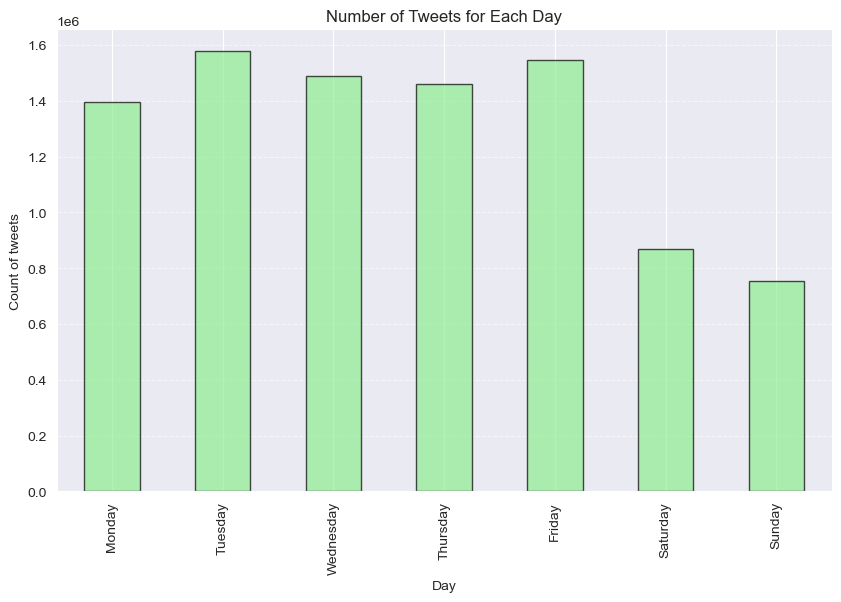

In [27]:
# Extract the day of the week from 'created_at' and create a new column
tweets['day_of_week'] = tweets['created_at'].dt.day_name()

# Count the number of tweets for each day of the week
tweet_counts_by_day = tweets['day_of_week'].value_counts()

# Define the order of the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder tweet_counts_by_day according to days_order
tweet_counts_by_day = tweet_counts_by_day.reindex(days_order)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of tweet_counts_by_day with different color palette
tweet_counts_by_day.plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.7)

# Set the labels and title
plt.xlabel('Day')
plt.ylabel('Count of tweets')
plt.title('Number of Tweets for Each Day')

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

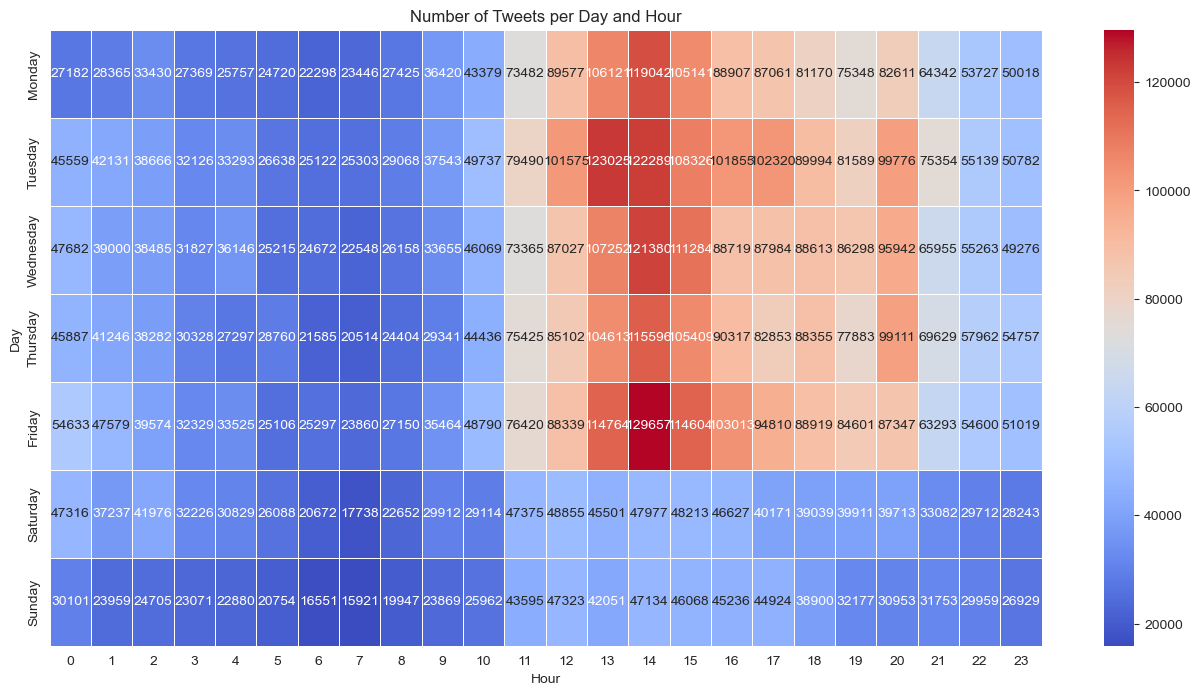

In [28]:
import seaborn as sns

# Extract the hour and day of week from 'created_at' and create a new dataframe
hour_and_day_df = tweets['created_at'].dt.hour.rename('hour').to_frame().join(tweets['created_at'].dt.day_name().rename('day_of_week'))

# Create a pivot table with the count of tweets for each hour and day of the week
tweets_pivot_table = pd.pivot_table(hour_and_day_df, index='day_of_week', columns='hour', aggfunc=len, fill_value=0)

# Reorder the index to start from Monday and end on Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_pivot_table = tweets_pivot_table.reindex(days_order)

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a heatmap with a different color palette
sns.heatmap(tweets_pivot_table, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Set the title and labels
plt.title('Number of Tweets per Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')

plt.show()

# Section 4

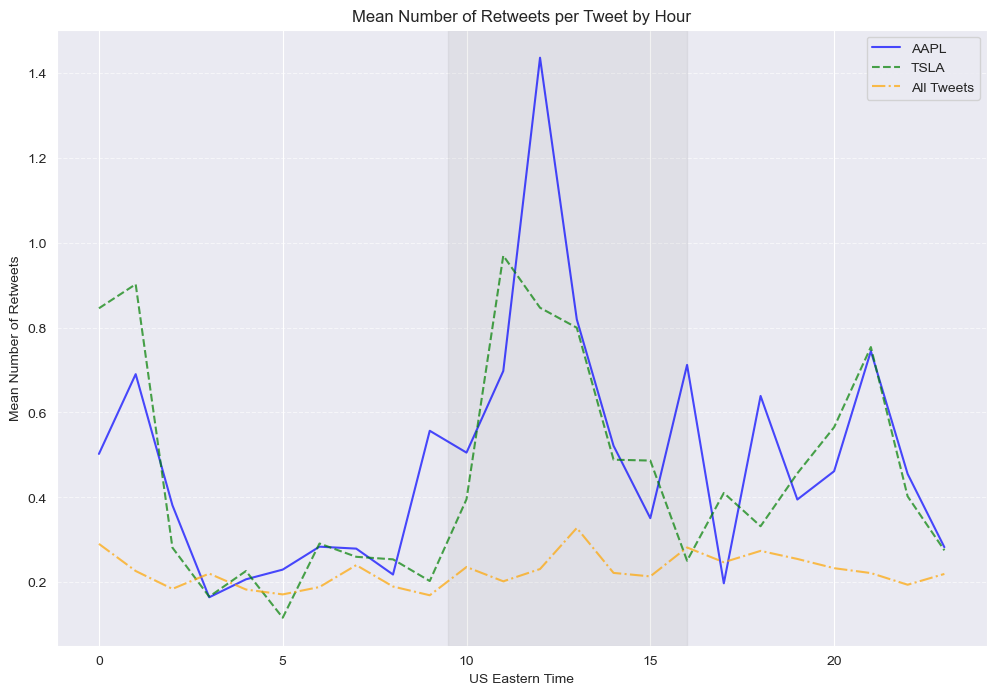

In [30]:
# Extract the hour and day from the 'created_at' timestamp
tweets['hour'] = tweets['created_at'].dt.hour
tweets['day'] = tweets['created_at'].dt.day
tweets['date'] = tweets['created_at'].dt.date

# Expand the 'extracted_cashtags' column into multiple rows
expanded_tweets = tweets.explode('cashtags')

# Filter for tweets related to AAPL and TSLA that have been retweeted
tweets_AAPL = expanded_tweets[(expanded_tweets['cashtags']=='AAPL') & (expanded_tweets['retweeted_status_id']!=0)]
tweets_TSLA = expanded_tweets[(expanded_tweets['cashtags']=='TSLA') & (expanded_tweets['retweeted_status_id']!=0)]

# Count the number of retweets for each tweet
retweet_counts = tweets['retweeted_status_id'].value_counts()

# Map the retweet counts to the corresponding tweet IDs
expanded_tweets['retweet_count'] = tweets['id'].map(retweet_counts)

# Replace NaN values in 'retweet_count' with 0
expanded_tweets['retweet_count'].fillna(0, inplace=True)

# Calculate the mean number of retweets per hour for each ticker
mean_retweets_per_hour_AAPL = tweets_AAPL.groupby('hour')['retweet_count'].mean()
mean_retweets_per_hour_TSLA = tweets_TSLA.groupby('hour')['retweet_count'].mean()

# Map the retweet counts to the corresponding tweet IDs in the original DataFrame
tweets['retweet_count'] = tweets['id'].map(retweet_counts)

# Replace NaN values in 'retweet_count' with 0 in the original DataFrame
tweets['retweet_count'].fillna(0, inplace=True)

# Calculate the mean number of retweets per hour for all tweets
mean_retweets_per_hour_all = tweets.groupby('hour')['retweet_count'].mean()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the mean number of retweets per hour for AAPL, TSLA, and all tweets with different line styles and colors
mean_retweets_per_hour_AAPL.plot(color='blue', alpha=0.7, linestyle='-', label='AAPL')
mean_retweets_per_hour_TSLA.plot(color='green', alpha=0.7, linestyle='--', label='TSLA')
mean_retweets_per_hour_all.plot(color='orange', alpha=0.7, linestyle='-.', label='All Tweets')

# Set the title, labels, and legend
plt.title('Mean Number of Retweets per Tweet by Hour')
plt.xlabel('US Eastern Time')
plt.ylabel('Mean Number of Retweets')
plt.legend()

# Highlight the trading hours (9:30 AM - 4:00 PM)
plt.axvspan(9.5, 16, color='gray', alpha=0.1)

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

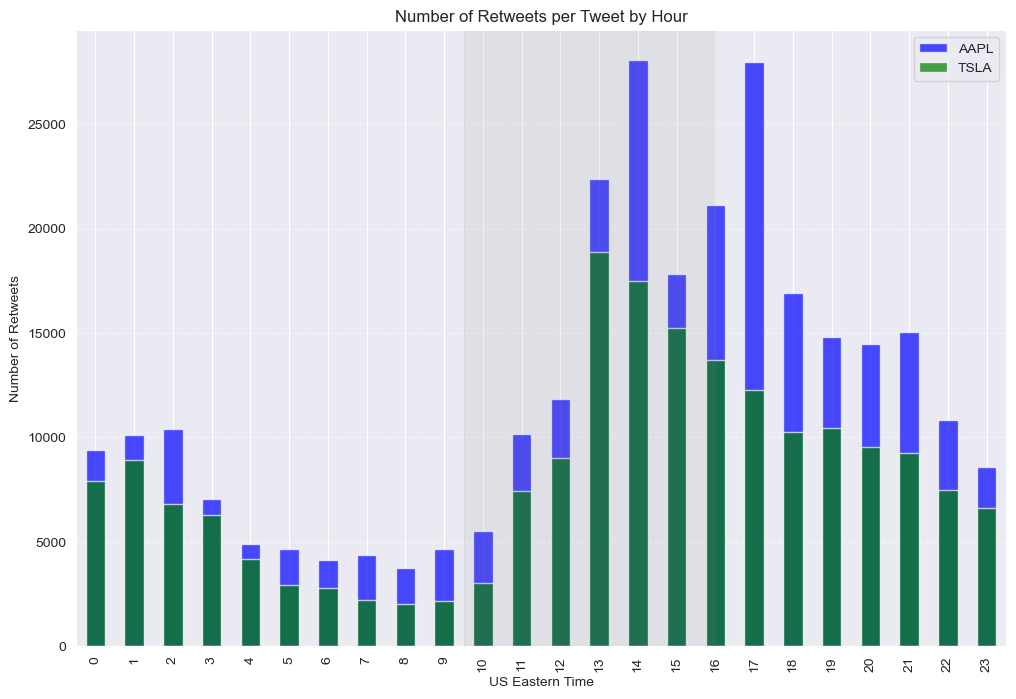

In [31]:
# Calculate the number of retweets per hour for each ticker
num_retweets_per_hour_AAPL = tweets_AAPL.groupby('hour')['retweet_count'].size()
num_retweets_per_hour_TSLA = tweets_TSLA.groupby('hour')['retweet_count'].size()

# Map the retweet counts to the corresponding tweet IDs in the original DataFrame
tweets['retweet_count'] = tweets['id'].map(retweet_counts)

# Replace NaN values in 'retweet_count' with 0 in the original DataFrame
tweets['retweet_count'].fillna(0, inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the number of retweets per hour for AAPL, TSLA, and all tweets with different bar colors
num_retweets_per_hour_AAPL.plot(kind='bar', color='blue', alpha=0.7, label='AAPL')
num_retweets_per_hour_TSLA.plot(kind='bar', color='green', alpha=0.7, label='TSLA')

# Set the title, labels, and legend
plt.title('Number of Retweets per Tweet by Hour')
plt.xlabel('US Eastern Time')
plt.ylabel('Number of Retweets')
plt.legend()

# Highlight the trading hours (9:30 AM - 4:00 PM)
plt.axvspan(9.5, 16, color='gray', alpha=0.1)

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

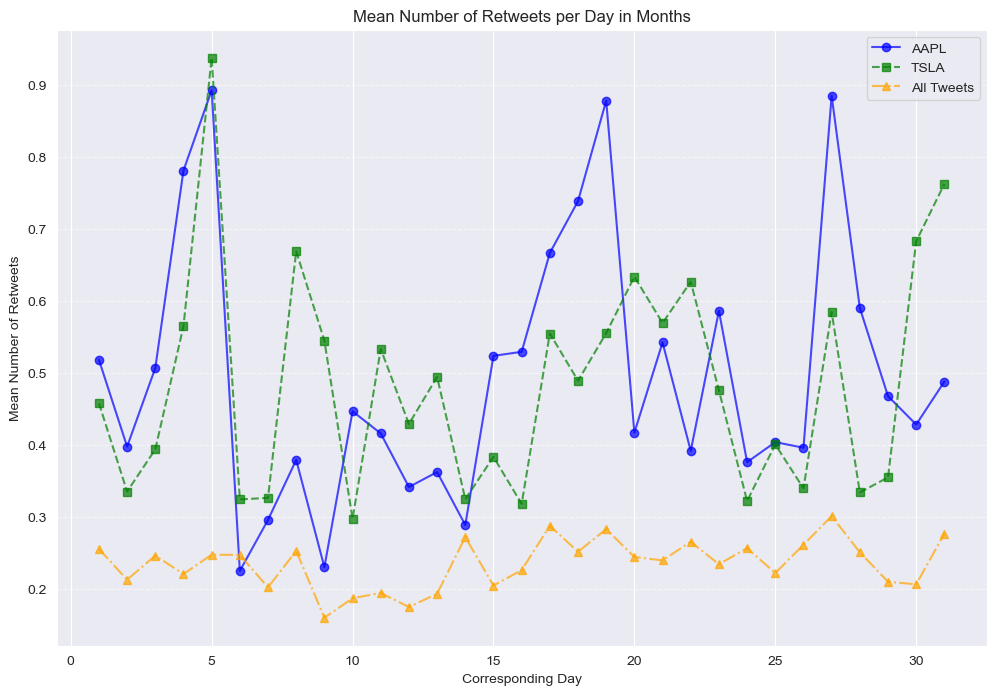

In [32]:
# Calculate the mean number of retweets per day for each ticker
mean_retweets_per_day_AAPL = tweets_AAPL.groupby('day')['retweet_count'].mean()
mean_retweets_per_day_TSLA = tweets_TSLA.groupby('day')['retweet_count'].mean()

# Map the retweet counts to the corresponding tweet IDs in the original DataFrame
tweets['retweet_count'] = tweets['id'].map(retweet_counts)

# Replace NaN values in 'retweet_count' with 0 in the original DataFrame
tweets['retweet_count'].fillna(0, inplace=True)

# Calculate the mean number of retweets per day for all tweets
mean_retweets_per_day_all = tweets.groupby('day')['retweet_count'].mean()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the mean number of retweets per day for AAPL, TSLA, and all tweets with different line styles and colors
mean_retweets_per_day_AAPL.plot(color='blue', alpha=0.7, linestyle='-', marker='o', label='AAPL')
mean_retweets_per_day_TSLA.plot(color='green', alpha=0.7, linestyle='--', marker='s', label='TSLA')
mean_retweets_per_day_all.plot(color='orange', alpha=0.7, linestyle='-.', marker='^', label='All Tweets')

# Set the title, labels, and legend
plt.title('Mean Number of Retweets per Day in Months')
plt.xlabel('Corresponding Day')
plt.ylabel('Mean Number of Retweets')
plt.legend()

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Section 5

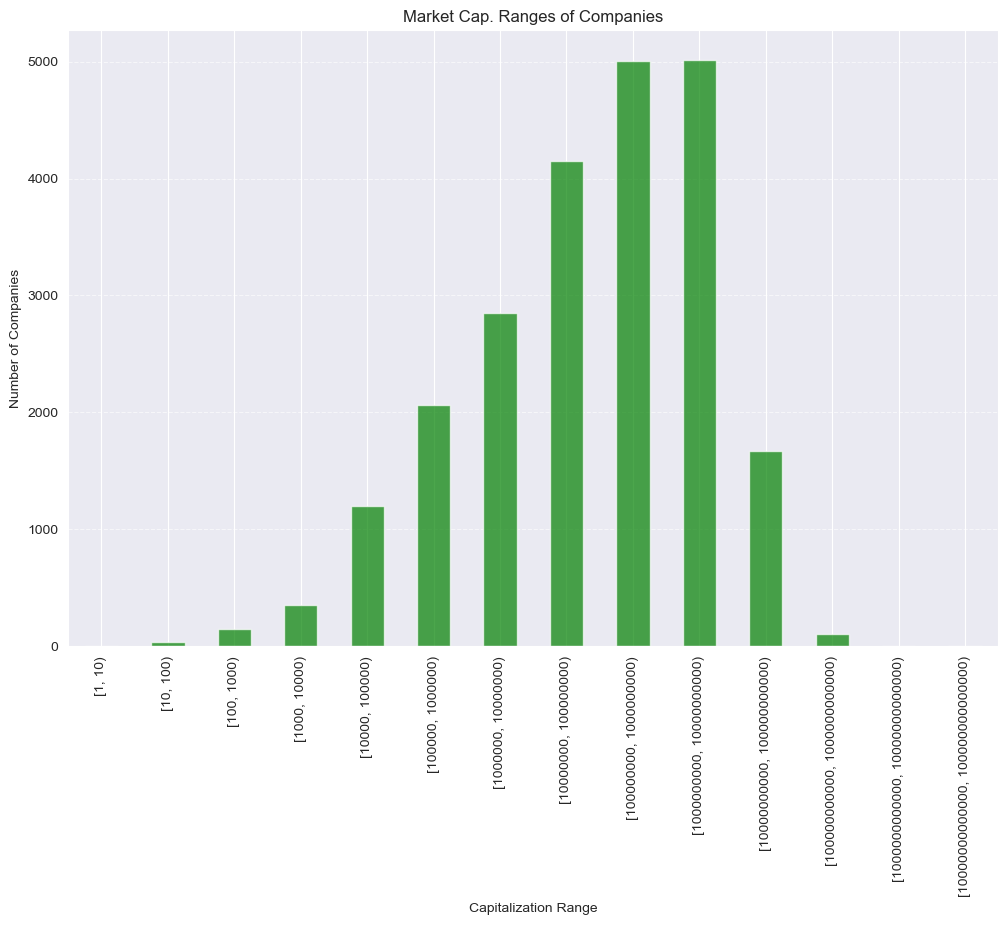

In [33]:
# Create capitalization ranges
capitalization_ranges = [10**i for i in range(0, 15)]

# Categorize companies into different capitalization ranges
companies_in_ranges = pd.cut(companies['capitalization'], bins=capitalization_ranges, include_lowest=True, right=False).value_counts(sort=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot of the number of companies in each capitalization range with a different color
companies_in_ranges.plot(kind='bar', color='green', alpha=0.7)

# Set the labels and title
plt.xlabel('Capitalization Range')
plt.ylabel('Number of Companies')
plt.title('Market Cap. Ranges of Companies')

# Add grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<Figure size 1200x800 with 0 Axes>

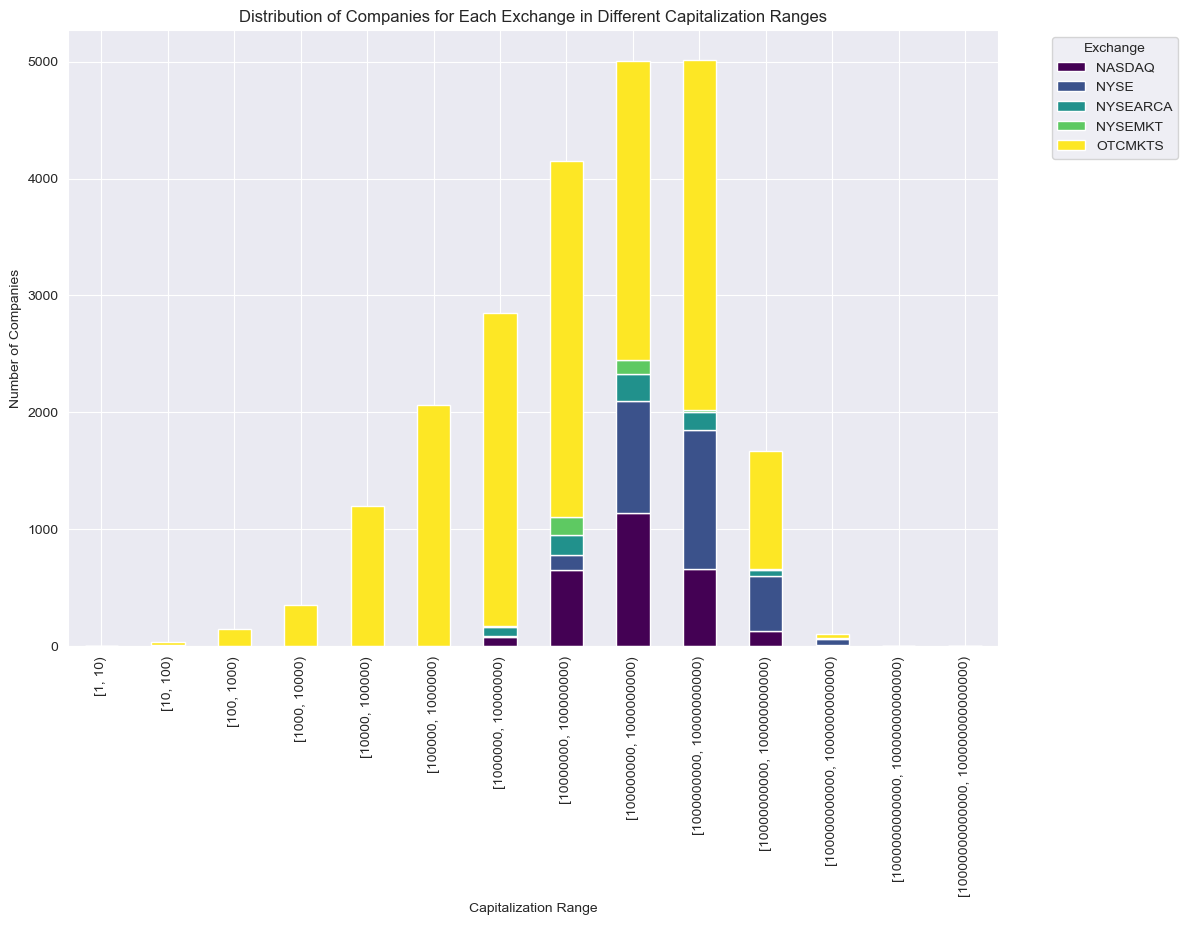

In [34]:
# Define the capitalization ranges
cap_ranges = [10**i for i in range(0, 15)]

# Create a new column 'cap_range' that categorizes 'capitalization' into ranges
companies['cap_range'] = pd.cut(companies['capitalization'], bins=cap_ranges, include_lowest=True, right=False)

# Group by 'cap_range' and 'exchange' to get the count of companies for each exchange in each capitalization range
grouped_df = companies.groupby(['cap_range', 'exchange']).size().reset_index(name='count')

# Pivot the DataFrame to get the count of companies for each exchange in each capitalization range
pivot_df = pd.pivot_table(grouped_df, values='count', index='cap_range', columns='exchange', fill_value=0)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a grouped bar plot with different colors for each exchange
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# Set the labels and title
plt.xlabel('Capitalization Range')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies for Each Exchange in Different Capitalization Ranges')

# Add a legend
plt.legend(title='Exchange', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9464\1480834946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exchange', y='capitalization', data=companies, palette=colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9464\1480834946.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(x='exchange', y='capitalization', data=companies, palette=colors)


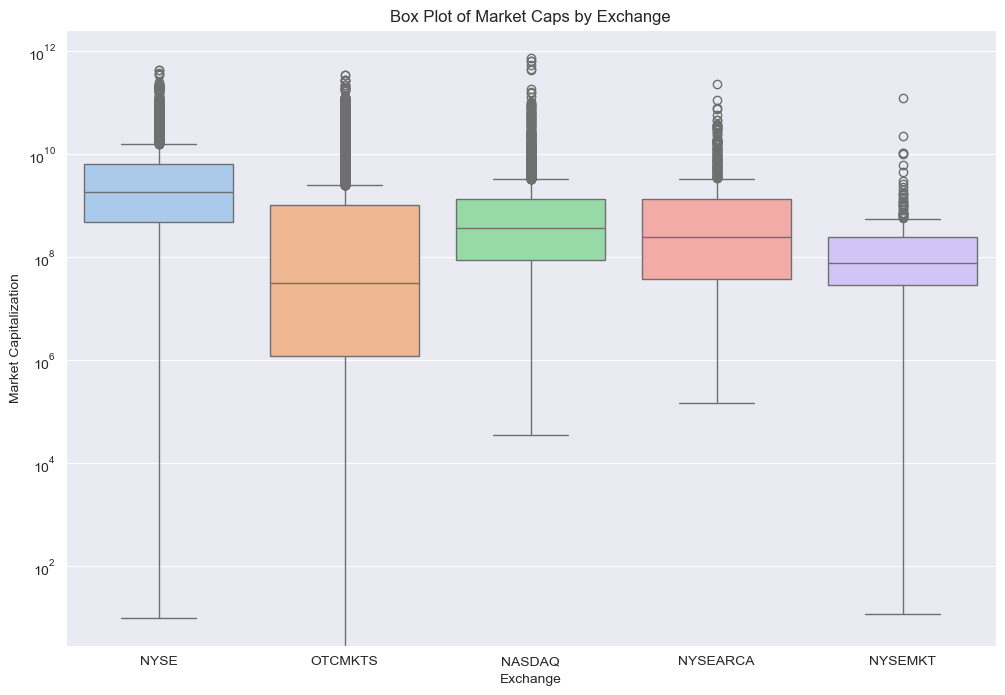

In [35]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot of market capitalizations by exchange with different colors
colors = sns.color_palette('pastel')
sns.boxplot(x='exchange', y='capitalization', data=companies, palette=colors)

# Set the labels and title
plt.title('Box Plot of Market Caps by Exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.yscale('log')

plt.show()

<Figure size 1200x800 with 0 Axes>

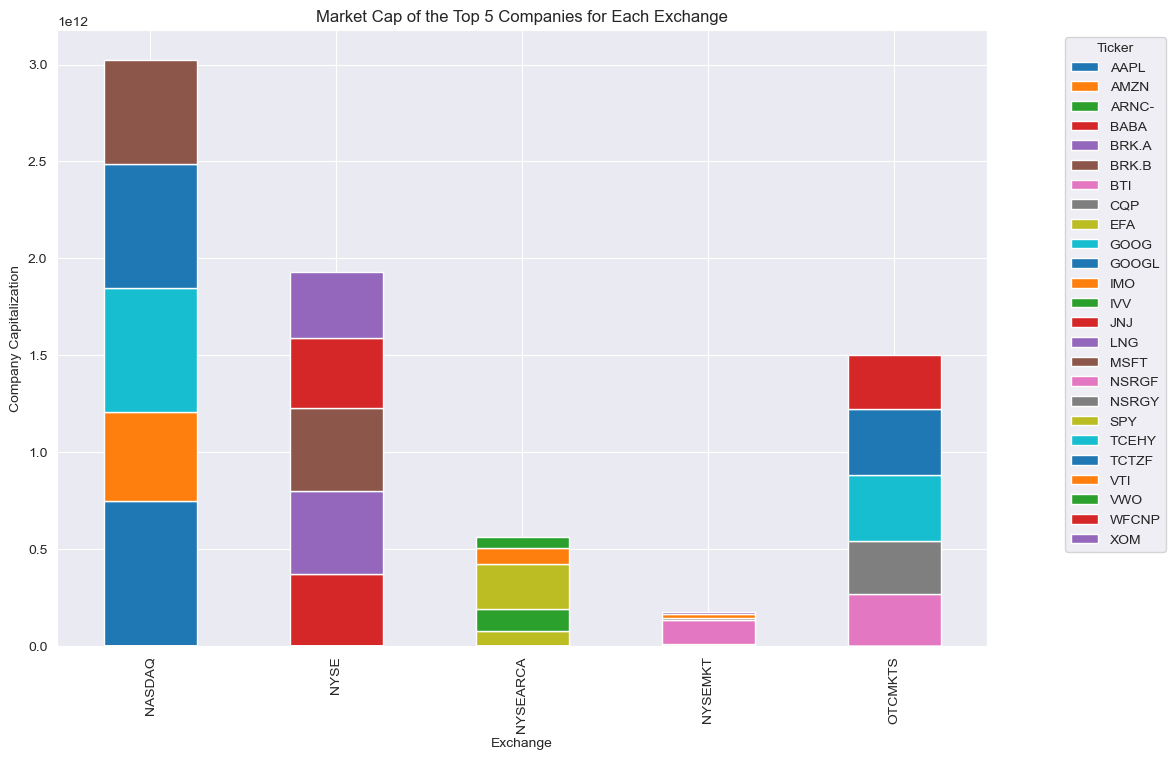

In [43]:
# Sort the companies their Market Cap in descending order
sorted_companies = companies.sort_values('capitalization', ascending=False)

# Group by 'exchange' and select the top 5 highest cap companies for each exchange
top_companies_by_exchange = sorted_companies.groupby('exchange').head(5)
pivot_df = pd.pivot_table(top_companies_by_exchange, values='capitalization', index='exchange', columns='ticker', fill_value=0)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a stacked bar plot with 'ticker' labels on the x-axis
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the labels and title
plt.xlabel('Exchange')
plt.ylabel('Company Capitalization')
plt.title('Market Cap of the Top 5 Companies for Each Exchange')

# Add a legend
plt.legend(title='Ticker', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

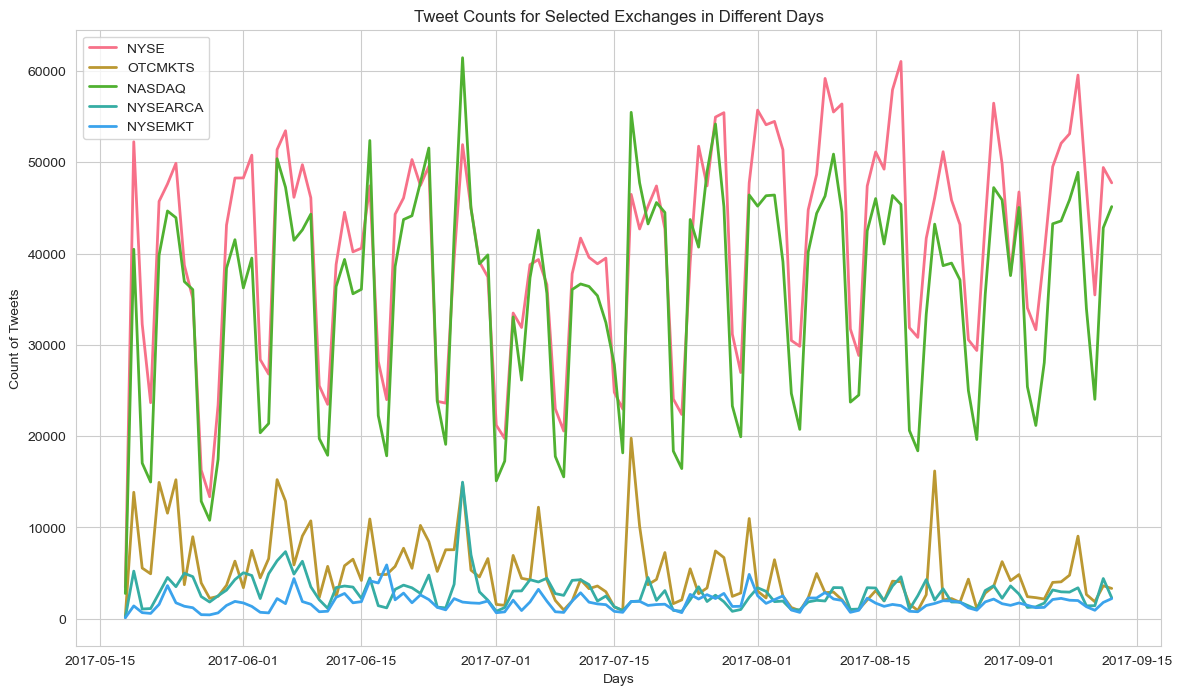

In [45]:
import seaborn as sns

# Set a seaborn style and custom color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a dictionary mapping company tickers to their corresponding exchanges
ticker_to_exchange = dict(zip(companies['ticker'], companies['exchange']))

# Define a function to map each ticker in a list to its exchange and remove duplicates
def map_tickers_to_exchanges(tickers):
    return list(set(ticker_to_exchange.get(ticker) for ticker in tickers))

# Apply the function to the 'extracted_cashtags' column to create the 'exchanges' column
tweets['exchanges'] = tweets['cashtags'].apply(map_tickers_to_exchanges)

# Explode the dataframe on 'exchanges'
exploded_tweets = tweets.explode('exchanges')

# Group by 'exchanges' and 'created_at' to get daily tweet counts
daily_tweet_counts = exploded_tweets.groupby(['exchanges', pd.Grouper(key='created_at', freq='D')]).size().reset_index(name='tweet_counts')

# Set the figure size
plt.figure(figsize=(14, 8))

# List of exchanges to plot
exchanges_to_plot = ['NYSE', 'OTCMKTS', 'NASDAQ', 'NYSEARCA', 'NYSEMKT']

# Create a line plot of tweet counts over time for each exchange
for exchange in exchanges_to_plot:
    exchange_data = daily_tweet_counts[daily_tweet_counts['exchanges'] == exchange]
    plt.plot(exchange_data['created_at'], exchange_data['tweet_counts'], label=exchange, linewidth=2)

# Set the labels and title
plt.xlabel('Days')
plt.ylabel('Count of Tweets')
plt.title('Tweet Counts for Selected Exchanges in Different Days')

# Add a legend
plt.legend()

# Display the plot
plt.show()

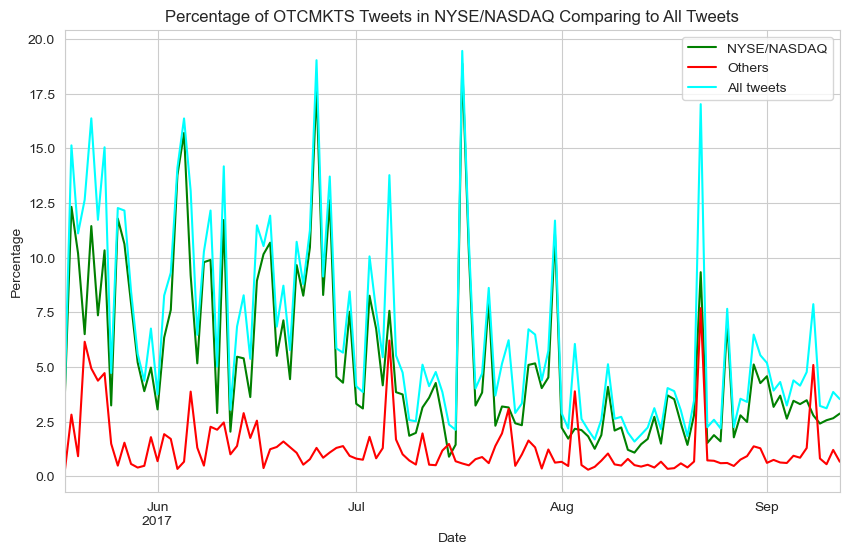

In [50]:
# Filter tweets dataframe to include only those with 'NYSE' or 'NASDAQ' in the 'exchanges' column
tweets_one = tweets[tweets['exchanges'].apply(lambda x: 'NYSE' in x or 'NASDAQ' in x)]

# Calculate the total number of tweets for each exchange by date
total_tweets = tweets.explode('exchanges').groupby([pd.Grouper(key='created_at', freq='D'), 'exchanges']).size()

# Filter for tweets with 'OTCMKTS' exchange
otcmkts_tweets = tweets[tweets['exchanges'].apply(lambda x: 'OTCMKTS' in x)]

# Calculate the number of 'OTCMKTS' tweets for each exchange by date
otcmkts_tweets_counts = otcmkts_tweets.explode('exchanges').groupby([pd.Grouper(key='created_at', freq='D'), 'exchanges']).size()

# Calculate the total number of tweets for each date
tweet_counts = tweets.groupby([pd.Grouper(key='created_at', freq='D')]).size()

# Filter tweets dataframe to include only those with 'OTCMKTS' in the 'exchanges' column
otcmkts_tweets_nyse_nasdaq = tweets_one[tweets_one['exchanges'].apply(lambda x: 'OTCMKTS' in x)]

# Calculate the percentage of 'OTCMKTS' tweets for NYSE and NASDAQ by date
percentage_otcmkts_nyse_nasdaq = (otcmkts_tweets_nyse_nasdaq.groupby([pd.Grouper(key='created_at', freq='D')]).size()) / tweet_counts * 100

# Calculate the number of 'OTCMKTS' tweets for exchanges other than NYSE and NASDAQ by date
otcmkts_tweets_counts_others = otcmkts_tweets_counts - percentage_otcmkts_nyse_nasdaq

plt.figure(figsize=(10, 6))
percentage_otcmkts_nyse_nasdaq.plot(kind='line', color='green', label='NYSE/NASDAQ')
otcmkts_tweets_counts_others.plot(kind='line', color='red', label='Others')
otcmkts_tweets_counts.plot(kind='line', color='cyan', label='All tweets')
plt.title('Percentage of OTCMKTS Tweets in NYSE/NASDAQ Comparing to All Tweets')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Section 6

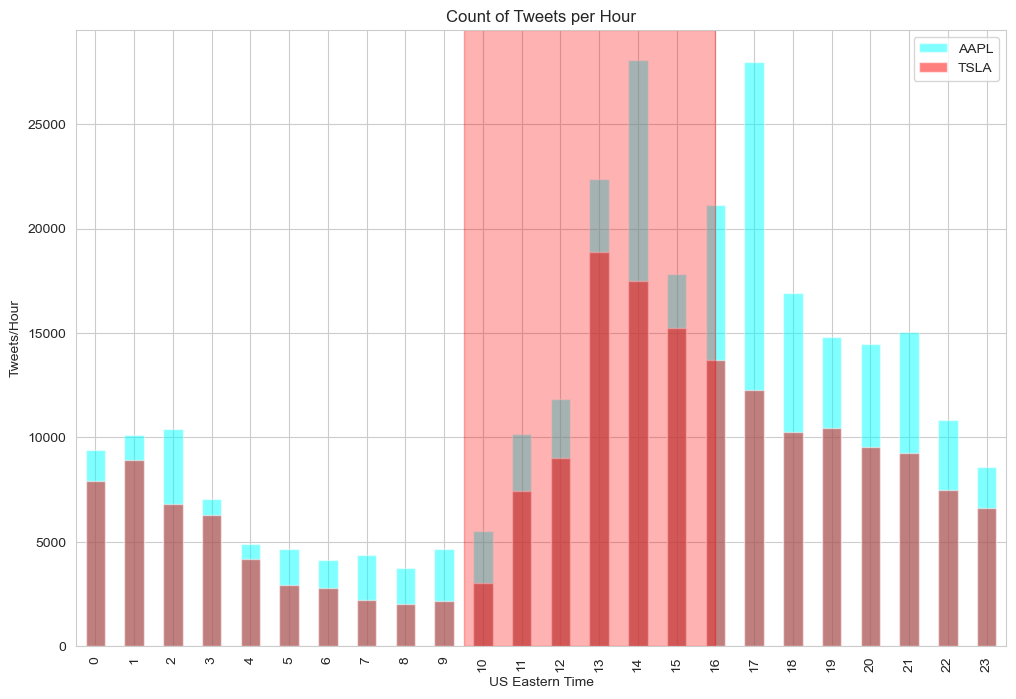

In [52]:
# Explode the 'extracted_cashtags' column in the tweets DataFrame
exploded_tweets = tweets.explode('cashtags')
# Extract the hour from the 'created_at' column
exploded_tweets['hour'] = tweets['created_at'].dt.hour

# Filter tweets for retweets of the AAPL and TSLA tickers
tweets_AAPL = exploded_tweets[exploded_tweets['cashtags'] == 'AAPL']
tweets_TSLA = exploded_tweets[exploded_tweets['cashtags'] == 'TSLA']

# Group by the hour and calculate the mean number of tweets for each ticker
mean_tweets_by_hour_AAPL = tweets_AAPL.groupby('hour').size()
mean_tweets_by_hour_TSLA = tweets_TSLA.groupby('hour').size()

# Plot the result
plt.figure(figsize=(12, 8))
plt.axis('on')
mean_tweets_by_hour_AAPL.plot(kind='bar', color='cyan', alpha=0.5, label='AAPL')
mean_tweets_by_hour_TSLA.plot(kind='bar', color='red', alpha=0.5, label='TSLA')

# Set the title, labels, and legend
plt.title('Count of Tweets per Hour')
plt.xlabel('US Eastern Time')
plt.ylabel('Tweets/Hour')
plt.axvspan(9.5, 16, color='red', alpha=0.3)
plt.legend()

# Display the plot
plt.show()

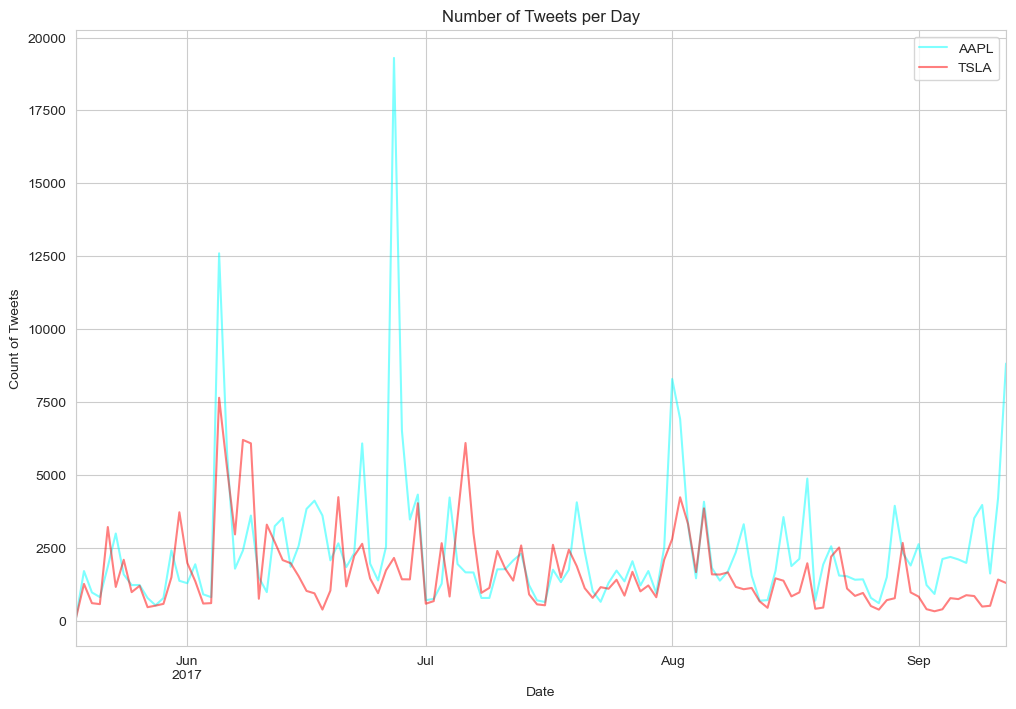

In [53]:
# Explode the 'cashtags' column in the tweets DataFrame
expanded_tweets = tweets.explode('cashtags')

# Filter for tweets related to the AAPL and TSLA that have been retweeted
tweets_AAPL = expanded_tweets[expanded_tweets['cashtags'] == 'AAPL']
tweets_TSLA = expanded_tweets[expanded_tweets['cashtags'] == 'TSLA']

# Group by the date and calculate the mean number of tweets for each ticker
mean_tweets_by_date_AAPL = tweets_AAPL.resample('D', on='created_at').size()
mean_tweets_by_date_TSLA = tweets_TSLA.resample('D', on='created_at').size()

# Plot the result
plt.figure(figsize=(12, 8))
mean_tweets_by_date_AAPL.plot(color='cyan', alpha=0.5, label='AAPL')
mean_tweets_by_date_TSLA.plot(color='red', alpha=0.5, label='TSLA')

# Set the title, labels, and legend
plt.title('Number of Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.legend()

# Display the plot
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9464\2547829101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_AAPL['day_of_week'] = tweets_AAPL['created_at'].dt.day_name()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9464\2547829101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_AAPL['day_of_month'] = tweets_AAPL['created_at'].dt.day
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9464\2547829101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

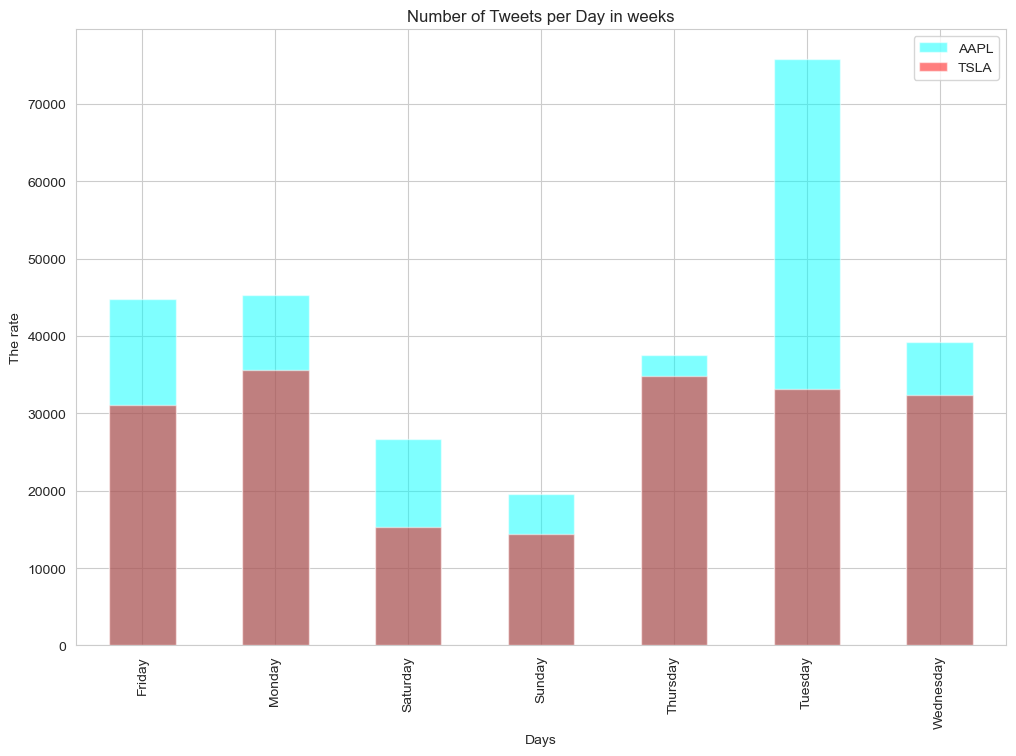

In [54]:
# Extract the day of the week and day of the month from 'created_at'
tweets_AAPL['day_of_week'] = tweets_AAPL['created_at'].dt.day_name()
tweets_AAPL['day_of_month'] = tweets_AAPL['created_at'].dt.day
tweets_TSLA['day_of_week'] = tweets_TSLA['created_at'].dt.day_name()
tweets_TSLA['day_of_month'] = tweets_TSLA['created_at'].dt.day

# Group by the day of the week and calculate the mean number of tweets for each ticker
mean_tweets_by_day_of_week_AAPL = tweets_AAPL.groupby('day_of_week').size()
mean_tweets_by_day_of_week_TSLA = tweets_TSLA.groupby('day_of_week').size()

# Group by the day of the month and calculate the mean number of tweets for each ticker
mean_tweets_by_day_of_month_AAPL = tweets_AAPL.groupby('day_of_month').size()
mean_tweets_by_day_of_month_TSLA = tweets_TSLA.groupby('day_of_month').size()

# Plot the result for day of the week
plt.figure(figsize=(12, 8))
mean_tweets_by_day_of_week_AAPL.plot(kind='bar', color='cyan', alpha=0.5, label='AAPL')
mean_tweets_by_day_of_week_TSLA.plot(kind='bar', color='red', alpha=0.5, label='TSLA')

# Set the title, labels, and legend
plt.title('Number of Tweets per Day in weeks')
plt.xlabel('Days')
plt.ylabel('The rate')
plt.legend()

# Display the plot
plt.show()

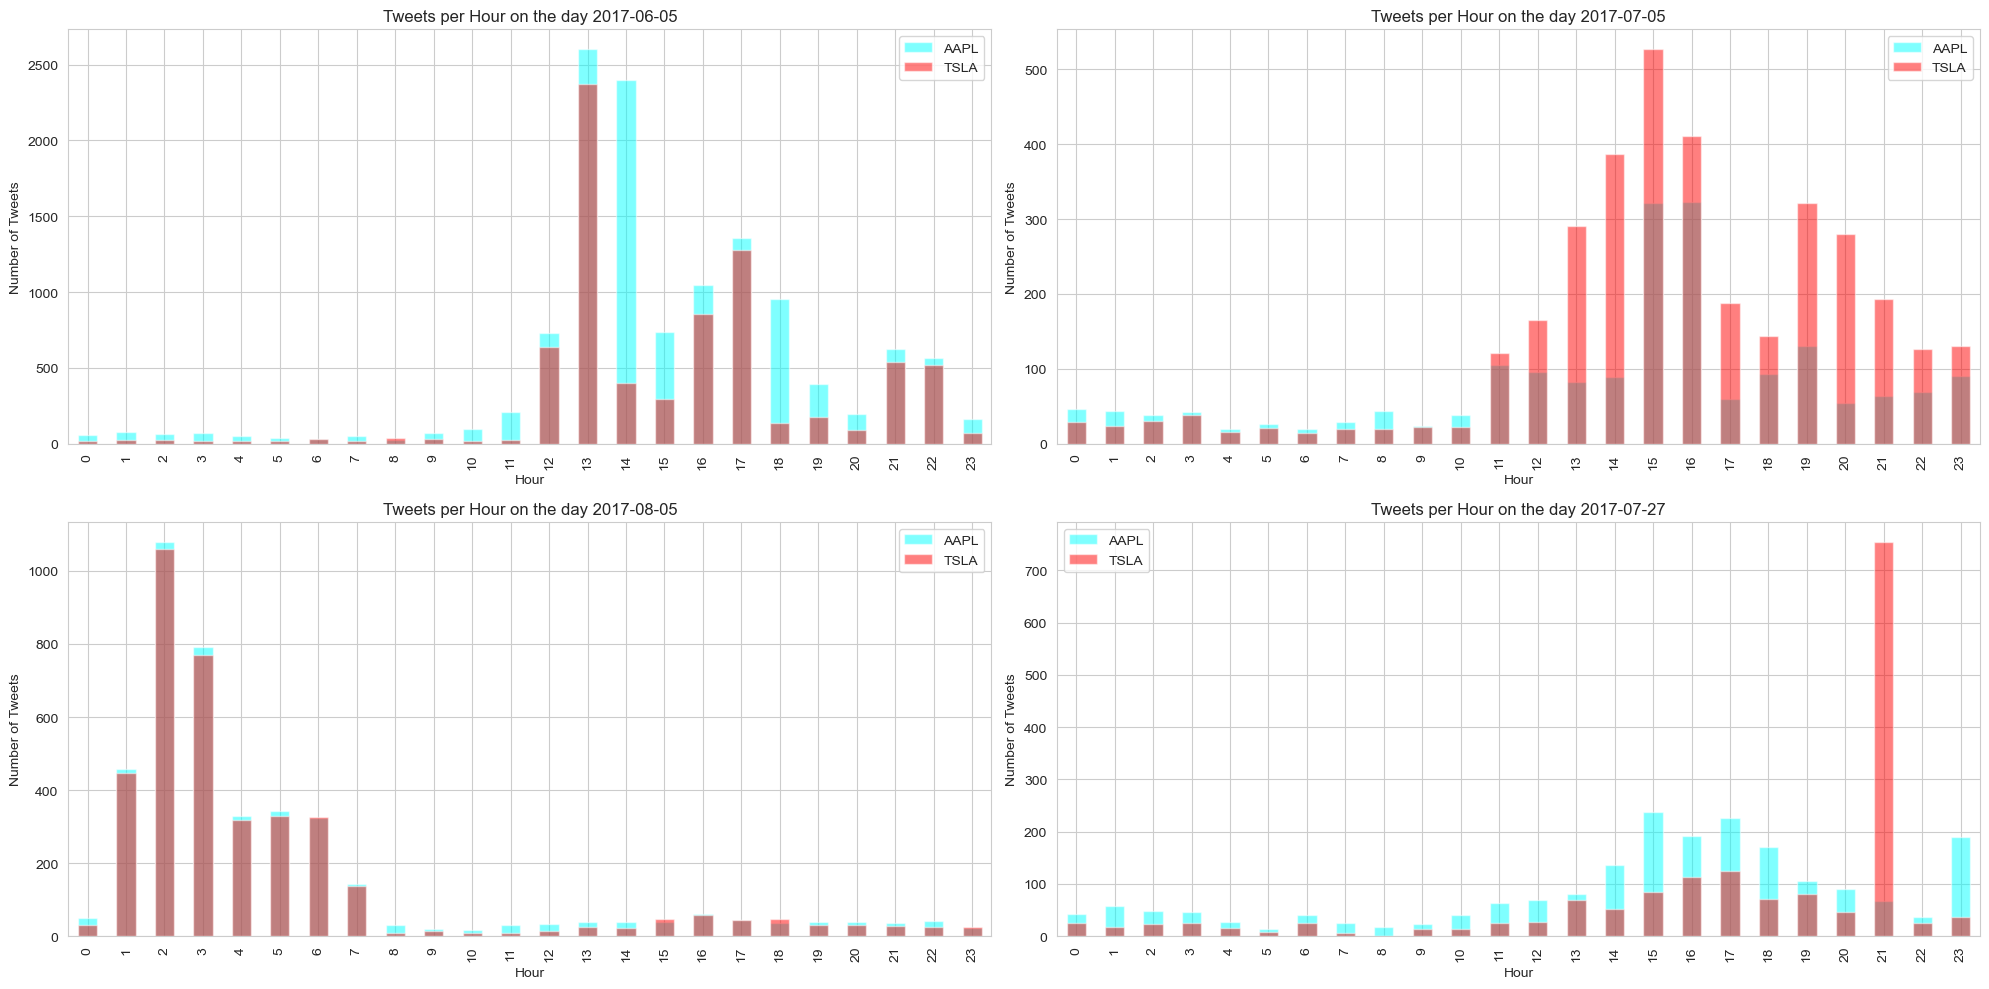

In [56]:
# Specify the dates
dates = [pd.to_datetime('2017-06-05'), pd.to_datetime('2017-07-05'), pd.to_datetime('2017-08-05'), pd.to_datetime('2017-07-27')]

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Flatten the axes
axs = axs.flatten()

# For each date, create a subplot
for i, date in enumerate(dates):
    # Filter for tweets related to the AAPL and TSLA that have been retweeted and are from the specified date
    tweets_AAPL_date = tweets_AAPL[tweets_AAPL['created_at'].dt.date == date.date()]
    tweets_TSLA_date = tweets_TSLA[tweets_TSLA['created_at'].dt.date == date.date()]
    
    # Group by the hour and calculate the number of tweets for each ticker
    tweets_by_hour_AAPL = tweets_AAPL_date.groupby(tweets_AAPL_date['created_at'].dt.hour).size()
    tweets_by_hour_TSLA = tweets_TSLA_date.groupby(tweets_TSLA_date['created_at'].dt.hour).size()
    
    # Plot the result in the subplot
    tweets_by_hour_AAPL.plot(kind='bar', color='cyan', alpha=0.5, label='AAPL', ax=axs[i])
    tweets_by_hour_TSLA.plot(kind='bar', color='red', alpha=0.5, label='TSLA', ax=axs[i])
    
    # Set the labels and title
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Number of Tweets')
    axs[i].set_title('Tweets per Hour on the day {}'.format(date.date()))
    
    # Add a legend
    axs[i].legend()

# Display the plot
plt.tight_layout()
plt.show()

The number of tweets about stocks can vary for several reasons, and these fluctuations may lead to changes in the overall tweet volume and peak times as it is visible from the four figures above, where the peak time of tweets per hour have moved from evening hours to morning. Here are some factors that can contribute to these variations:

1. **Market Activity:** The stock market operates during specific hours, and major events, news releases, or market fluctuations can lead to increased discussions on social media. If there are significant developments after the regular trading hours, you may see an increase in tweets during the evening or overnight.

2. **Global Markets:** Stocks are traded globally, and different time zones can influence when people are actively discussing stocks on social media. Events or news affecting a particular stock may occur in different regions, leading to variations in tweet volume throughout the day.

3. **Earnings Releases and Events:** Earnings reports, company announcements, or industry events often happen during specific timeframes. These events can prompt discussions on social media, and the timing of such announcements can affect when peaks in tweet volume occur.

4. **Social Media Influencers:** The influence of specific individuals, such as financial analysts, celebrities, or other notable figures, can lead to spikes in tweet activity. If influential people share their opinions or insights on a stock, it can cause a surge in discussions, and the timing of their posts can vary.

5. **News Cycles:** Stock-related news can break at any time during the day. Depending on when news is released, it can impact tweet volumes during different hours.

6. **Market Sentiment:** General market sentiment and investor emotions can influence tweet volume. For example, during periods of high market volatility or uncertainty, people may be more active on social media platforms discussing their views and reactions to market movements.

7. **Bot Activity:** Automated trading bots or social media bots may contribute to sudden spikes in tweet volumes. These bots can be programmed to respond to certain market conditions, news, or keywords, leading to fluctuations in activity.

# Section 7

I tested many different approaches by which we can determine the co-occurrence of each pair of cashtags, but because of the large volume of data, it was impossible and took a lot of time, So I brought some samples of that.  

In [58]:
# List of cashtags
cashtags = ['AAPL', 'TSLA', 'FB', 'BABA', 'AMZN', 'MSFT']

# Function to calculate co-occurrence
def calculate_co_occurrence(tag1, tag2, tweets):
    count = len(tweets[tweets['cashtags'].apply(lambda x: tag1 in x and tag2 in x)])
    return count

# Print co-occurrence in a different format
for i in range(5):
    for j in range(i + 1, 6):
        tag1, tag2 = cashtags[i], cashtags[j]
        co_occurrence_count = calculate_co_occurrence(tag1, tag2, tweets)
        print(f"{tag1} and {tag2} co-occurred {co_occurrence_count} times.")

AAPL and TSLA co-occurred 37383 times.
AAPL and FB co-occurred 75782 times.
AAPL and BABA co-occurred 10822 times.
AAPL and AMZN co-occurred 59693 times.
AAPL and MSFT co-occurred 29839 times.
TSLA and FB co-occurred 21991 times.
TSLA and BABA co-occurred 4996 times.
TSLA and AMZN co-occurred 43597 times.
TSLA and MSFT co-occurred 3615 times.
FB and BABA co-occurred 10925 times.
FB and AMZN co-occurred 44542 times.
FB and MSFT co-occurred 28385 times.
BABA and AMZN co-occurred 13004 times.
BABA and MSFT co-occurred 5839 times.
AMZN and MSFT co-occurred 24828 times.
